# 4.0 Decision Tree

## Import libraries

In [1]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [2]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram, plot_evaluations
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

In [3]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.utils.paths import references_dir
from src.utils.metrics import display_and_plot_all_metrics, calculate_metrics


## Set up

In [4]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [5]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_FINAL_CSV_PATH = data_dir("processed", "df_wine_complete.csv")

print(f"{WINES_FINAL_CSV_PATH}")

c:\Users\cvigo\data-projects\proyecto-final-vinos\vinos-corderhouse\data\processed\df_wine_complete.csv


In [6]:
df_wines = pd.read_csv(WINES_FINAL_CSV_PATH)

In [7]:
df_wines.sample(10)

,quality_high,body_2,body_3,body_4,body_5,style_red,style_white,region_Otras,region_Priorato,region_Rias Baixas,region_Ribera del Duero,region_Rioja,region_Toro,region_Vino de Espana,PC1,PC2,PC3,PC4,PC5,PC6,PC7
5744,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0.091291,-0.599124,0.017571,-0.034851,0.167515,0.142035,-0.185346
3111,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.173573,-0.118101,-0.126152,0.146522,-0.189283,-0.126779,-0.035994
5324,1,0,0,1,0,0,1,0,0,0,0,1,0,0,-0.157103,0.103425,0.508307,-0.197089,0.028327,0.185465,-0.075355
4212,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.185910,0.157720,0.071083,0.141706,-0.124535,-0.059892,-0.175677
2607,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0.188058,-0.552924,-0.151056,-0.079701,-0.036803,0.252252,0.136498
1170,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.540121,0.100501,-0.312406,-0.144899,0.285275,-0.005983,-0.135907
2068,1,0,1,0,0,0,1,1,0,0,0,0,0,0,-0.535775,0.382642,-0.233586,0.410044,0.015501,-0.046436,0.033497
2076,1,0,0,0,1,0,1,0,0,0,0,0,1,0,-0.013033,-0.483191,-0.143933,-0.161367,0.104082,-0.012296,0.032674
2806,1,0,0,1,0,0,1,0,1,0,0,0,0,0,-0.361458,-0.103666,-0.194607,-0.222611,0.041537,-0.125996,0.068102
5589,1,0,1,0,0,0,1,1,0,0,0,0,0,0,-0.059085,-0.608713,-0.075630,-0.055915,0.020994,0.280091,0.187765


# Preparamos los datos

In [8]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir
X = df_wines.drop(columns=["quality_high"])
y = df_wines.quality_high #Defino el Target

In [9]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
X_train.shape, X_test.shape

((4246, 20), (1821, 20))

# Decision Tree

In [10]:
tree = DecisionTreeClassifier(max_depth=3, random_state = 42) #Creamos el modelo
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [11]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

## Metricas

In [13]:
# Calculo las metricas de evaluacion
metrics_tree = calculate_metrics('tree', tree,X_test,y_test,y_test_pred)
metrics_tree

,tree
accuracy,0.67
precision,0.7
recall,0.84
f1,0.77
roc_auc,0.71
fpr,"[0.0, 0.13273001508295626, 0.19607843137254902..."
tpr,"[0.0, 0.43955094991364424, 0.5284974093264249,..."
thresholds,"[1.8678286129266521, 0.8678286129266521, 0.677..."


# Metricas: 

### Metricas calculadas

,recall,f1,roc_auc,precision,accuracy
tree,0.84,0.77,0.71,0.7,0.67


### Grafico de confusion matrix: 

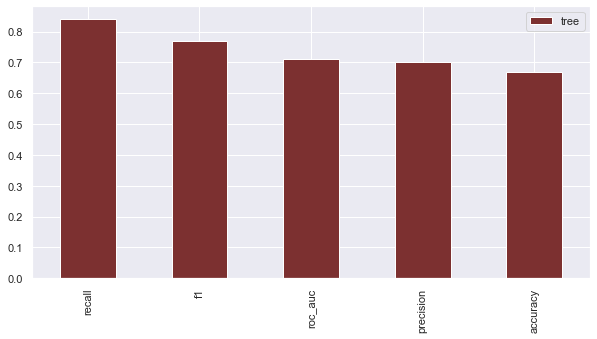

<Figure size 720x720 with 0 Axes>

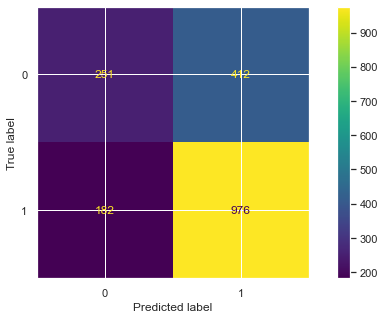

### Grafico de roc: 

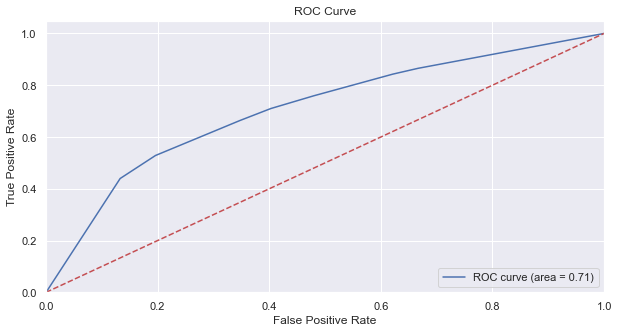

In [14]:
display_and_plot_all_metrics('tree', tree,X_test,y_test,y_test_pred)

## Importancia de las variables

c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


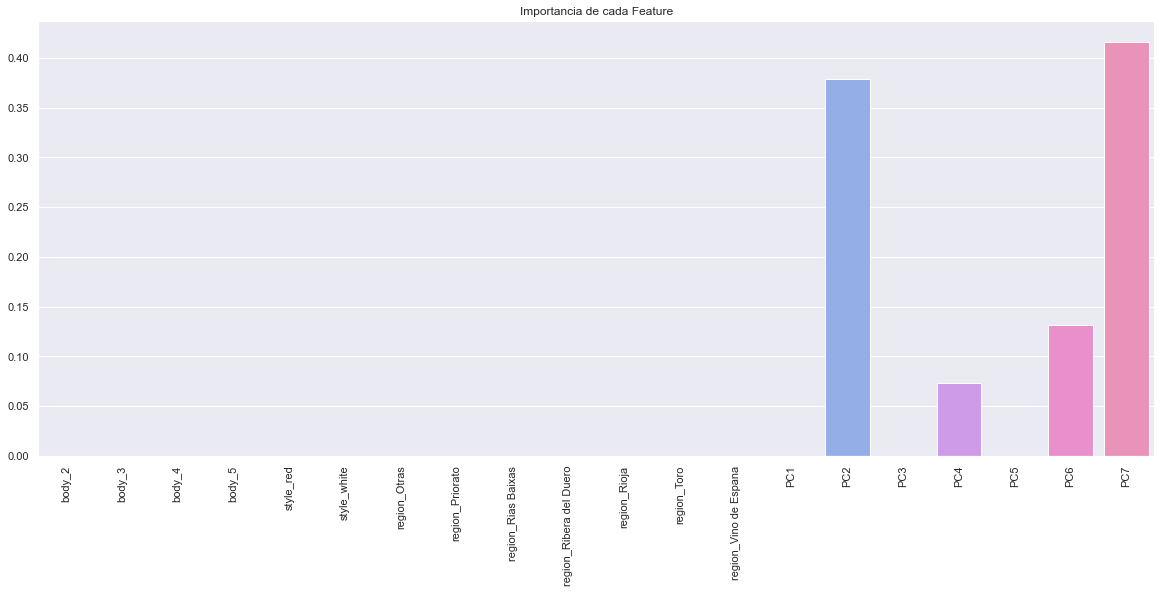

In [16]:
plt.figure(figsize=(20,8))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.xticks(rotation=90)
plt.show()

Para este algoritmo la importancia se centra en las variables:
- PC2
- PC4
- PC6
- PC7

In [20]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir y las variables de poca importancia
X = df_wines[['PC2','PC4','PC6','PC7']]
y = df_wines.quality_high #Defino el Target

In [21]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [22]:
X_train.shape, X_test.shape

((4246, 4), (1821, 4))

# Hypertuning de Parámetros

En las metricas vamos a priorizar la metrica de precision ya que queremos reducir los falsos positivos porque eso implica que lso vinos de baja calidad sean clasificados como de baja calidad, y cuando se exporten puede generar malestar en los clientes y baja fidelidad.

In [23]:
# Hyperparametros

hyperparameters={
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
model = BayesSearchCV(DecisionTreeClassifier(),
                      hyperparameters,
                      scoring='precision', 
                      n_points= 5,
                      n_iter= 30,
                      cv= 5,
                      verbose = 2,
                      n_jobs=6,
                      random_state= 88)


In [24]:
model.fit(X_train, y_train)
clf = model.best_estimator_
y_test_pred = pd.Series(clf.predict(X_test), index=X_test.index)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [25]:
# Calculo las metricas de evaluacion
metrics_tree_tuning = calculate_metrics('tree_tuning', clf,X_test,y_test,y_test_pred)
metrics_tree_tuning

,tree_tuning
accuracy,0.68
precision,0.73
recall,0.79
f1,0.76
roc_auc,0.73
fpr,"[0.0, 0.007541478129713424, 0.0271493212669683..."
tpr,"[0.0, 0.025906735751295335, 0.2236614853195164..."
thresholds,"[1.9629629629629628, 0.9629629629629629, 0.944..."


# Metricas: 

### Metricas calculadas

,recall,f1,precision,roc_auc,accuracy
tree_tuning,0.79,0.76,0.73,0.73,0.68


### Grafico de confusion matrix: 

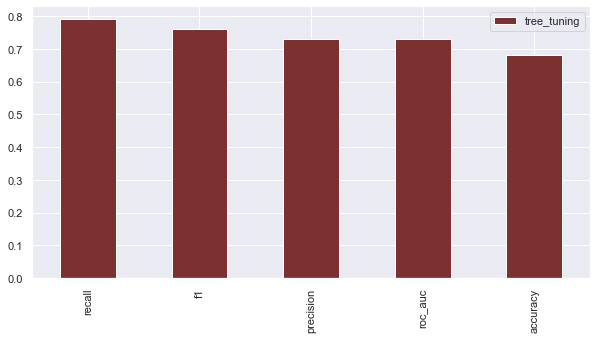

<Figure size 720x720 with 0 Axes>

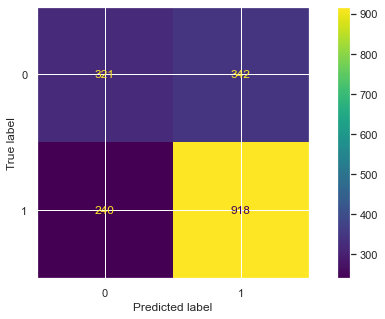

### Grafico de roc: 

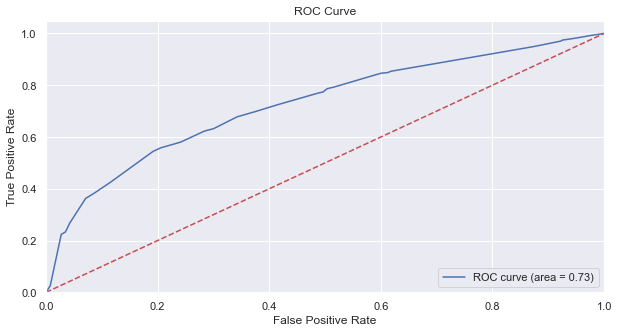

In [26]:
display_and_plot_all_metrics('tree_tuning',clf,X_test,y_test,y_test_pred)

## Oversampling

Como estamos trabajando con una clase desbalanceada, vamos a hacer un over sampling para mitigar el problema.

In [27]:
X_resampled, y_resampled = RandomOverSampler().fit_resample(X_train, y_train)

In [33]:
model = BayesSearchCV(DecisionTreeClassifier(),
                      hyperparameters,
                      scoring='precision',
                      n_points= 5,
                      n_iter= 30,
                      cv= 5,
                      verbose = 2,
                      n_jobs=6,
                      random_state= 88)


In [34]:
model.fit(X_resampled, y_resampled)
clf = model.best_estimator_
y_test_pred = pd.Series(clf.predict(X_test), index=X_test.index)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [35]:
# Calculo las metricas de evaluacion
metrics_tree_tuning_oversampling = calculate_metrics('tree_tuning_oversampling', clf,X_test,y_test,y_test_pred)
metrics_tree_tuning_oversampling

,tree_tuning_oversampling
accuracy,0.62
precision,0.73
recall,0.65
f1,0.69
roc_auc,0.65
fpr,"[0.0, 0.2594268476621418, 0.2654600301659125, ..."
tpr,"[0.0, 0.5181347150259067, 0.5233160621761658, ..."
thresholds,"[2.0, 1.0, 0.8888888888888888, 0.875, 0.857142..."


# Metricas: 

### Metricas calculadas

,precision,f1,recall,roc_auc,accuracy
tree_tuning_oversampling,0.73,0.69,0.65,0.65,0.62


### Grafico de confusion matrix: 

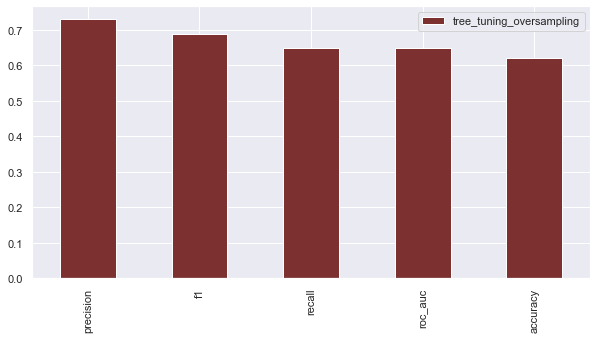

<Figure size 720x720 with 0 Axes>

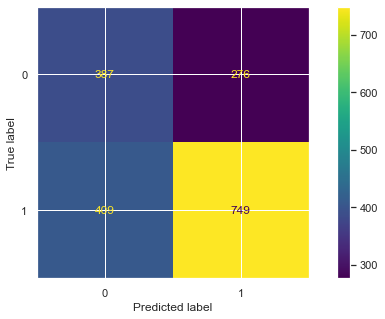

### Grafico de roc: 

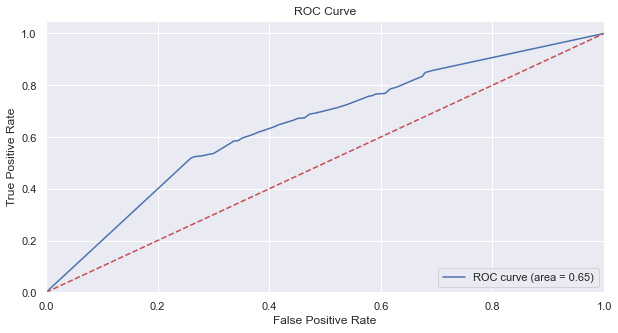

In [36]:
display_and_plot_all_metrics('tree_tuning_oversampling', clf,X_test,y_test,y_test_pred)

In [32]:
#Obtenemos los mejores parametros para el modelo
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
BASIC_METRICS = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

<AxesSubplot:>

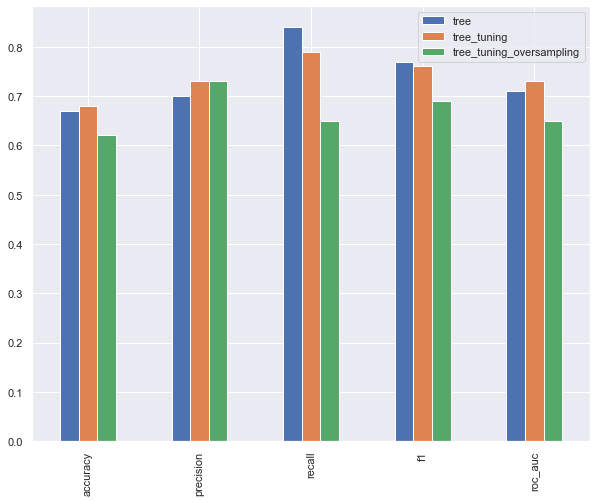

In [45]:
# Comparamos las metricas

pd.concat([metrics_tree, metrics_tree_tuning, metrics_tree_tuning_oversampling], axis=1).loc[BASIC_METRICS,:].plot(kind='bar', figsize=(10,8))


In [47]:
# Guardamos las metricas en un csv
pd.concat([metrics_tree, metrics_tree_tuning, metrics_tree_tuning_oversampling], axis=1).T.to_csv(data_dir("processed", "metrics_tree.csv"),index_label='algorithm')